In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer

In [2]:
# Reading the data file into a DATAFRAME and checking the shape 
data=pd.read_csv('AmazonMobileDataUncleaned.csv')
print(data.shape)

(71922, 2)


In [3]:
def datapreprocess(sen):
    
    sen = re.sub(r"didn't", "did not", sen)
    sen = re.sub(r"don't", "do not", sen)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r"wasn't", "do not", sen)
    sen = re.sub(r"\'ve", " have", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"\'ll", " will", sen)
    sen = re.sub(r"\'re", " are", sen)
    sen = re.sub(r"\'s", " is", sen)
    sen = re.sub(r"\'d", " would", sen)
    sen = re.sub(r"\'t", " not", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"n\'t", " not", sen)
    
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    sen=sen.lower() # convert text to lower case
    words=sen.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
    
    

stop=set(stopwords.words('english'))
print(stop)
stop.remove('no')
stop.remove('not')
stop.remove('nor')

preprocessed_essays = []
for sentance in data['uncleanedreview'].values:
    try:
        ctxt=datapreprocess(str(sentance))
        if len(ctxt)==0: raise()
        ctxt = ' '.join(e for e in ctxt.split() if e not in stop)
        preprocessed_essays.append(ctxt.lower().strip())
    except:
        preprocessed_essays.append("NAN")  
data['cleanedtext'] = preprocessed_essays
data.drop(data[data["cleanedtext"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
data=data.reset_index(drop='true') # after deleting rows index should be reset
data['decision']= data['decision'].replace('positive',1)
data['decision']= data['decision'].replace('negative',0)


s = SnowballStemmer("english")
p=[]
for i in data['cleanedtext'].values:
    k=[]
    for word in i.split():
        k.append(s.stem(word))
    l=' '.join(k)
    p.append(l)

data['j']=p

data.to_csv (r'AmazonMobileDataCleaned.csv')

{'same', 'than', 'or', 'his', "should've", 'having', 'didn', 'a', 'needn', 'through', "we're", 'above', 'is', "she'd", 'about', 'after', 'for', "won't", 'he', 'who', 'but', 'yourself', 'do', 'now', 'while', "it's", 'wouldn', "haven't", "it'll", 'no', 'she', "needn't", 'the', 'where', 'll', "shan't", "you'll", 'not', 'ain', "hasn't", 'i', 'you', 'it', "we'll", 'hers', 'by', 'themselves', 'with', 'most', 'out', 'until', 'doing', 'few', 'mightn', 'down', 'shouldn', 'doesn', 'be', 'my', 'o', 'me', "don't", "mightn't", 'own', 'your', "we'd", 'should', "i'll", 'ourselves', 'during', 'once', 't', 'will', "doesn't", "wasn't", 'yourselves', 'so', 'been', 'very', 'on', "they'd", 'couldn', 'if', "i'm", 'further', 'its', 'they', 'haven', "i've", 'here', 'mustn', 'myself', 'which', 'y', "he'll", "mustn't", 'm', 'ours', 'when', 'to', 'being', 's', 'weren', 'whom', 'hasn', 'between', 'again', 'can', 'then', 'below', 'their', 'had', 'our', 've', "that'll", 'did', "isn't", 'as', "wouldn't", "couldn't",

/var/folders/0p/wyfyjj_94yv7kd73x6j_gc9c0000gn/T/ipykernel_10560/3623132011.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['decision']= data['decision'].replace('negative',0)


In [4]:
data=pd.read_csv('AmazonMobileDataCleaned.csv',nrows=5000)
print(data.shape)
label = data['decision'].values
feedback = data.drop(['decision'], axis=1)
print(label.shape)
print(feedback.shape)
print("------------------------------")

from sklearn.model_selection import train_test_split
inputtrain, inputtest, outputtrain, outputtest = train_test_split(feedback, label, test_size=0.20, stratify=label)
print(inputtrain.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputtest.shape)

(5000, 5)
(5000,)
(5000, 4)
------------------------------
(4000, 4)
(1000, 4)
(4000,)
(1000,)


In [7]:
# convert into Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
featur = []
vec = CountVectorizer(min_df=10,ngram_range=(1,4))
vec.fit(inputtrain['j'].values) # fit has to happen only on train data


train_cleanedtext = vec.transform(inputtrain['j'].values)
test_cleanedtext= vec.transform(inputtest['j'].values)

print("After vectorizations")
print(train_cleanedtext.shape)
print(test_cleanedtext.shape)
print(outputtrain.shape)
print(outputtest.shape)
print("...............................")

featur += list(vec.get_feature_names_out())

After vectorizations
(4000, 2797)
(1000, 2797)
(4000,)
(1000,)
...............................


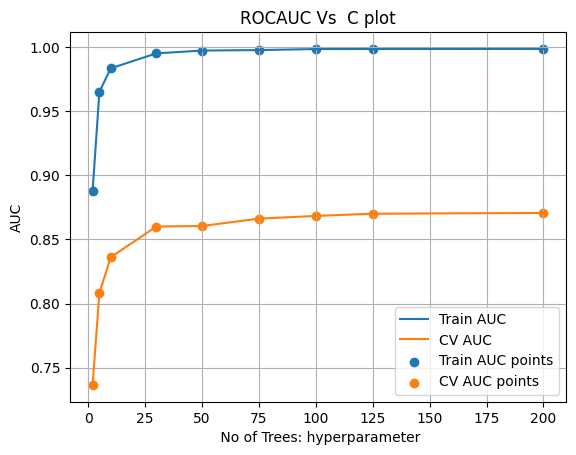

{'n_estimators': 200}
0.8707061031773676


In [8]:
# Packages required
# some of the code taken from stack overflow
import math
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


neigh = RandomForestClassifier(max_samples=0.5,max_features=0.5)

n_estimators=np.array([2,5,10,30,50,75,100,125,200]) # no of trees
tuned_parameters = {'n_estimators' : n_estimators} 


clf = GridSearchCV(neigh, tuned_parameters, cv=5, scoring='roc_auc',return_train_score=True) 
clf.fit(train_cleanedtext, outputtrain)

results = pd.DataFrame.from_dict(clf.cv_results_)#please check the output of cv_results_
#  gridsearchcv execution will understand. concepts required KFold cross validation
results = results.sort_values(['param_n_estimators'])

train_auc= results['mean_train_score']

cv_auc = results['mean_test_score'] 

k =  results['param_n_estimators']

#alpha1=[]
#for i in range(0,len(k),1):
#   l=math.log10(k[i])
#   alpha1.append(l)
#alpha1.sort()
plt.plot(k, train_auc, label='Train AUC')

plt.plot(k, cv_auc, label='CV AUC')

plt.scatter(k, train_auc, label='Train AUC points')
plt.scatter(k, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel(" No of Trees: hyperparameter")
plt.ylabel("AUC")
plt.title("ROCAUC Vs  C plot")
plt.grid()
plt.show()


print(clf.best_params_)
print(clf.best_score_)
#print("best C log value")
#a=math.log10(clf.best_params_.get('C'))
#print(a)

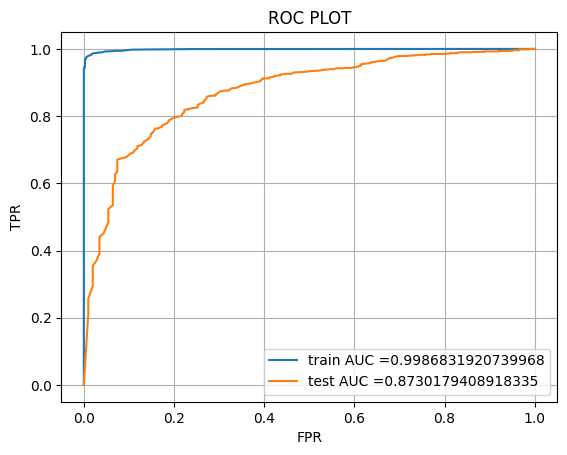

---------------------------------------------------
the maximum value of tpr*(1-fpr) 0.9699148573861217 for threshold 0.625
Train confusion matrix


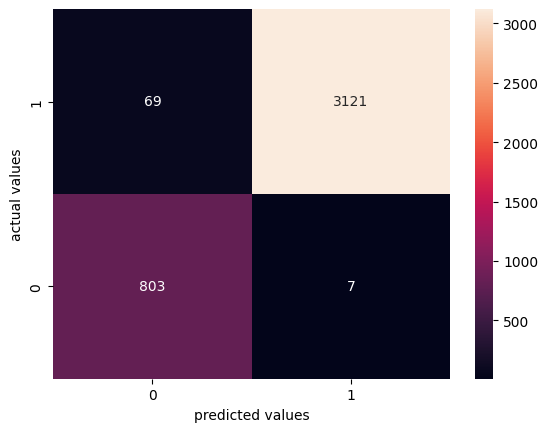

Test confusion matrix


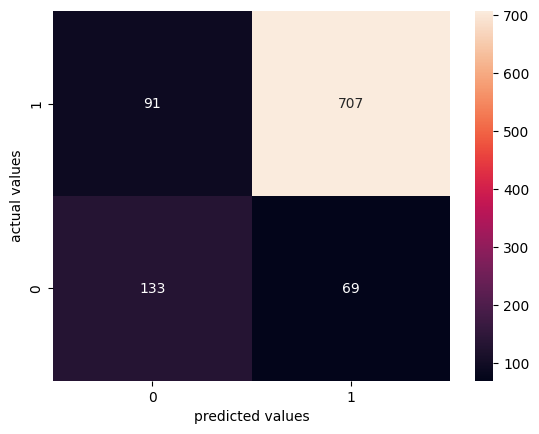

In [9]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

neigh = RandomForestClassifier(n_estimators = 200,max_samples=0.5,max_features=0.5)
neigh.fit(train_cleanedtext, outputtrain)



y_train_pred = neigh.predict_proba(train_cleanedtext)[:,1]    
y_test_pred = neigh.predict_proba(test_cleanedtext)[:,1]
#print(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(outputtrain, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(outputtest, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()


def bestthreshold(threshould, fpr, tpr):# function to predict best threshold
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predictusingbestt(proba, threshould):#prediction using best threshold
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("---------------------------------------------------")


from sklearn.metrics import confusion_matrix
best_t = bestthreshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")

ax=sns.heatmap(confusion_matrix(outputtrain, predictusingbestt(y_train_pred, best_t)),annot=True,fmt='d')
ax.set_ylim([0,2])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
print("Test confusion matrix")


bx=sns.heatmap(confusion_matrix(outputtest, predictusingbestt(y_test_pred, best_t)),annot=True,fmt='d')
bx.set_ylim([0,2])

plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()